In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
df.shape

(100003, 4)

In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df=pd.merge(df,movie_titles,on ='item_id')

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### EDA

<AxesSubplot:>

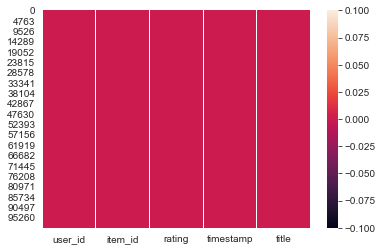

In [33]:
sns.heatmap(df.isnull())

In [8]:
df['title'].value_counts() # hitest movie

Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
                            ... 
Mad Dog Time (1996)            1
MURDER and murder (1996)       1
Yankee Zulu (1994)             1
T-Men (1947)                   1
Daens (1992)                   1
Name: title, Length: 1664, dtype: int64

In [9]:
df['user_id'].value_counts() # highest view by a single person at this period

405    737
655    685
13     636
450    540
276    518
      ... 
824     20
888     20
441     20
571     20
0        3
Name: user_id, Length: 944, dtype: int64

In [10]:
grp=df.groupby('title')
grp['rating'].mean().sort_values(ascending=False)  #average rating

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [11]:
grp['rating'].count().sort_values(ascending=False) #number of rating

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [12]:
dfr =pd.DataFrame(grp['rating'].mean())

In [13]:
dfr.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [14]:
dfr['rating_count'] =pd.DataFrame(grp['rating'].count())

In [15]:
dfr.head()

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:xlabel='rating_count', ylabel='Count'>

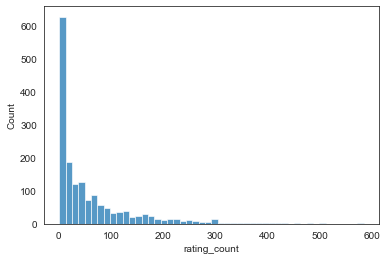

In [16]:
sns.histplot(dfr['rating_count'])

<AxesSubplot:xlabel='rating', ylabel='Count'>

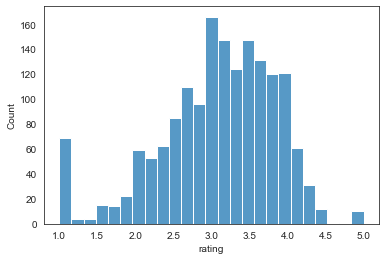

In [17]:
sns.histplot(dfr['rating'])

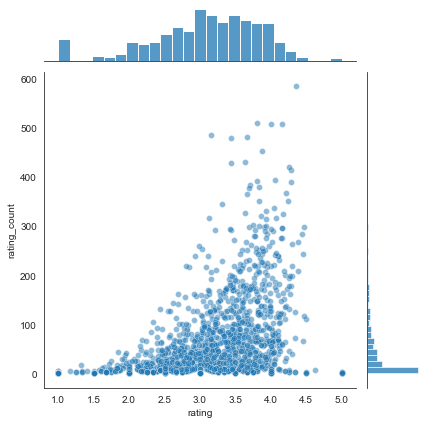

In [18]:
sns.jointplot(x='rating',y='rating_count',data=dfr,alpha=0.5)

#### RECOMMENDING MOVIE

In [19]:
moviematrix=df.pivot_table(index='user_id',columns='title',values='rating')
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfr.sort_values('rating_count',ascending=False).head(5)

,rating,rating_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


##### Recomondation for someone who watched Starwars 

In [24]:
starwars_user_ratings=moviematrix['Star Wars (1977)']
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [25]:
similar_to_starwars = moviematrix.corrwith(starwars_user_ratings)
#similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [26]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [48]:
cor_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlationwithstarwar'])

In [49]:
cor_starwars.dropna(inplace=True)
cor_starwars.head()

,Correlationwithstarwar
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [38]:
cor_starwars.sort_values('Correlation',ascending=False)

,Correlation,number_ratings
title,,
Stripes (1981),1.0,5
Hollow Reed (1996),1.0,6
Hurricane Streets (1998),1.0,9
"Beans of Egypt, Maine, The (1994)",1.0,2
"Scarlet Letter, The (1926)",1.0,2
...,...,...
Theodore Rex (1995),-1.0,5
I Like It Like That (1994),-1.0,3
Roseanna's Grave (For Roseanna) (1997),-1.0,5


In [30]:
cor_starwars['number_ratings']=dfr['rating_count']

In [31]:
cor_starwars

,Correlation,number_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [32]:
cor_starwars.sort_values('number_ratings',inplace=True)

In [41]:
filt=cor_starwars['number_ratings']>100
cor_starwars=cor_starwars.loc[filt]

In [47]:
cor_starwars.sort_values('Correlation',ascending=False,inplace=True)

In [48]:
cor_starwars

,Correlation,number_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [ ]:
If someone watched starwars , The next movie reccomnededis for him will beEmpire Strikes Back, The (1980), 
based on the ratings given by the users watched starwars

In [40]:
moviematrix[['Empire Strikes Back, The (1980)','Star Wars (1977)']]

title,"Empire Strikes Back, The (1980)",Star Wars (1977)
user_id,,
0,5.0,5.0
1,5.0,5.0
2,NaN,5.0
3,NaN,NaN
4,NaN,5.0
...,...,...
939,NaN,NaN
940,4.0,4.0
941,NaN,NaN


##### Recomondation for someone who watched 125 Angry Men

In [42]:
twelveangrymen_u_rating=moviematrix['12 Angry Men (1957)']
twelveangrymen_u_rating

user_id
0      NaN
1      5.0
2      NaN
3      NaN
4      NaN
      ... 
939    NaN
940    NaN
941    NaN
942    NaN
943    NaN
Name: 12 Angry Men (1957), Length: 944, dtype: float64

In [66]:
similar_12AM= moviematrix.corrwith(twelveangrymen_u_rating)
corr_angrymen=pd.DataFrame(similar_12AM.sort_values(ascending=False),columns=['Corr_with_12angrymen'])

In [68]:
corr_angrymen['rating_count']=dfr['rating_count']

In [80]:
filt1=corr_angrymen['rating_count']>60  #taking the movies only with reviews or rating_count more than 60
corr_angrymen=corr_angrymen['rating_count'].loc[filt1]

In [82]:
corr_angrymen.sort_values(ascending=False)

title
Star Wars (1977)                                 584
Contact (1997)                                   509
Fargo (1996)                                     508
Return of the Jedi (1983)                        507
Liar Liar (1997)                                 485
                                                ... 
Batman & Robin (1997)                             62
Cat on a Hot Tin Roof (1958)                      62
Forget Paris (1995)                               62
Fox and the Hound, The (1981)                     61
Homeward Bound: The Incredible Journey (1993)     61
Name: rating_count, Length: 534, dtype: int64